In [1]:
#PART 2: Identify the three providers that are least similar to other providers and the the three regions that 
#are least similar to other region

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling


from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

C:\Users\prana\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
Medicare_Provider_Charge_In = pd.read_csv(r'C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\9. End to End Foundation Case Study-1\Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
Medicare_Provider_Charge_Out = pd.read_csv(r'C:\Users\prana\Desktop\Quarntine\AnalatyicsLab\Python\3._Case_Studies_Final_Projects_-_Python\9. End to End Foundation Case Study-1\Medicare_Provider_Charge_Outpatient_APC30_CY2011_v2.csv')

In [5]:
Medicare_Provider_Charge_In.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   DRG Definition                              163065 non-null  object 
 1   Provider Id                                 163065 non-null  int64  
 2   Provider Name                               163065 non-null  object 
 3   Provider Street Address                     163065 non-null  object 
 4   Provider City                               163065 non-null  object 
 5   Provider State                              163065 non-null  object 
 6   Provider Zip Code                           163065 non-null  int64  
 7   Hospital Referral Region (HRR) Description  163065 non-null  object 
 8   Total Discharges                            163065 non-null  int64  
 9   Average Covered Charges                     163065 non-null  float64
 

In [7]:
Medicare_Provider_Charge_Out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   APC                                         43372 non-null  object 
 1   Provider Id                                 43372 non-null  int64  
 2   Provider Name                               43372 non-null  object 
 3   Provider Street Address                     43372 non-null  object 
 4   Provider City                               43372 non-null  object 
 5   Provider State                              43372 non-null  object 
 6   Provider Zip Code                           43372 non-null  int64  
 7   Hospital Referral Region (HRR) Description  43372 non-null  object 
 8   Outpatient Services                         43372 non-null  int64  
 9   Average  Estimated Submitted Charges        43372 non-null  float64
 10  Average To

In [8]:
Medicare_Provider_Charge_In.isnull().any()

DRG Definition                                False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Total Discharges                              False
Average Covered Charges                       False
Average Total Payments                        False
Average Medicare Payments                     False
dtype: bool

In [9]:
Medicare_Provider_Charge_Out.isnull().any()

APC                                           False
Provider Id                                   False
Provider Name                                 False
Provider Street Address                       False
Provider City                                 False
Provider State                                False
Provider Zip Code                             False
Hospital Referral Region (HRR) Description    False
Outpatient Services                           False
Average  Estimated Submitted Charges          False
Average Total Payments                        False
dtype: bool

In [10]:
pandas_profiling.ProfileReport(Medicare_Provider_Charge_In)

In [11]:
pandas_profiling.ProfileReport(Medicare_Provider_Charge_Out)

In [12]:
Medicare_In_data = Medicare_Provider_Charge_In[['DRG Definition', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                              'Total Discharges', 'Average Covered Charges', 'Average Total Payments' ]]

In [13]:
Medicare_In_data

DRG Definition  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
...                                          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC   
163061            948 - SIGNS & SYMPTOMS W/O MCC   
163062            948 - SIGNS & SYMPTOMS W/O MCC   
163063            948 - SIGNS & SYMPTOMS W/O MCC   
163064            948 - SIGNS & SYMPTOMS W/O MCC   

                                          Provider Name Provider State  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1                         MARSHALL MEDICAL CENTER SOUTH             AL   
2                        ELIZA COFFEE MEMORIAL HOSPITAL             AL   
3                                     ST VINCENT'S EAST             AL   
4                         SHELBY BAPTIST MEDICAL CENTER             AL   
...                                                 ...            ...   
163060                  SETON MEDICAL CENTER WILLIAMSON             TX   
163061                     METHODIST STONE OAK HOSPITAL             TX   
163062                        SETON MEDICAL CENTER HAYS             TX   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE             TX   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND             TX   

       Hospital Referral Region (HRR) Description  Total Discharges  \
0                                     AL - Dothan                91   
1                                 AL - Birmingham                14   
2                                 AL - Birmingham                24   
3                                 AL - Birmingham                25   
4                                 AL - Birmingham                18   
...                                           ...               ...   
163060                                TX - Austin                23   
163061                           TX - San Antonio                11   
163062                                TX - Austin                19   
163063                                TX - Dallas                11   
163064                                TX - Dallas                12   

        Average Covered Charges  Average Total Payments  
0                   32963.07692             5777.241758  
1                   15131.85714             5787.571429  
2                   37560.37500             5434.958333  
3                   13998.28000             5417.560000  
4                   31633.27778             5658.333333  
...                         ...                     ...  
163060              26314.39130             3806.869565  
163061              21704.72727             4027.363636  
163062              39121.73684             5704.368421  
163063              28873.09091             7663.090909  
163064              15042.00000             3539.750000  

[163065 rows x 7 columns]

In [14]:
Medicare_In_data.rename(columns={'DRG Definition' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Total Discharges' : 'Count Of Services', 'Average Covered Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

C:\Users\prana\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
Medicare_In_data

Procedures  \
0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
...                                          ...   
163060            948 - SIGNS & SYMPTOMS W/O MCC   
163061            948 - SIGNS & SYMPTOMS W/O MCC   
163062            948 - SIGNS & SYMPTOMS W/O MCC   
163063            948 - SIGNS & SYMPTOMS W/O MCC   
163064            948 - SIGNS & SYMPTOMS W/O MCC   

                                          Provider Name Provider State  \
0                      SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1                         MARSHALL MEDICAL CENTER SOUTH             AL   
2                        ELIZA COFFEE MEMORIAL HOSPITAL             AL   
3                                     ST VINCENT'S EAST             AL   
4                         SHELBY BAPTIST MEDICAL CENTER             AL   
...                                                 ...            ...   
163060                  SETON MEDICAL CENTER WILLIAMSON             TX   
163061                     METHODIST STONE OAK HOSPITAL             TX   
163062                        SETON MEDICAL CENTER HAYS             TX   
163063       TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE             TX   
163064  TEXAS HEALTH PRESBYTERIAN HOSPITAL FLOWER MOUND             TX   

                  Region  Count Of Services      Charges      Payment  
0            AL - Dothan                 91  32963.07692  5777.241758  
1        AL - Birmingham                 14  15131.85714  5787.571429  
2        AL - Birmingham                 24  37560.37500  5434.958333  
3        AL - Birmingham                 25  13998.28000  5417.560000  
4        AL - Birmingham                 18  31633.27778  5658.333333  
...                  ...                ...          ...          ...  
163060       TX - Austin                 23  26314.39130  3806.869565  
163061  TX - San Antonio                 11  21704.72727  4027.363636  
163062       TX - Austin                 19  39121.73684  5704.368421  
163063       TX - Dallas                 11  28873.09091  7663.090909  
163064       TX - Dallas                 12  15042.00000  3539.750000  

[163065 rows x 7 columns]

In [16]:
Medicare_Out_data = Medicare_Provider_Charge_Out[['APC', 'Provider Name', 'Provider State', 'Hospital Referral Region (HRR) Description',
                                                 'Outpatient Services', 'Average  Estimated Submitted Charges', 'Average Total Payments' ]]

In [17]:
Medicare_Out_data

APC  \
0      0012 - Level I Debridement & Destruction   
1      0012 - Level I Debridement & Destruction   
2      0012 - Level I Debridement & Destruction   
3      0012 - Level I Debridement & Destruction   
4      0012 - Level I Debridement & Destruction   
...                                         ...   
43367    0698 - Level II Eye Tests & Treatments   
43368    0698 - Level II Eye Tests & Treatments   
43369    0698 - Level II Eye Tests & Treatments   
43370    0698 - Level II Eye Tests & Treatments   
43371    0698 - Level II Eye Tests & Treatments   

                                           Provider Name Provider State  \
0                    EAST ALABAMA MEDICAL CENTER AND SNF             AL   
1                     CENTRAL PENINSULA GENERAL HOSPITAL             AK   
2       UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE             AZ   
3                          BANNER BAYWOOD MEDICAL CENTER             AZ   
4      UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE             AZ   
...                                                  ...            ...   
43367    UNIVERSITY OF WI  HOSPITALS & CLINICS AUTHORITY             WI   
43368                                   BELOIT MEM HSPTL             WI   
43369  UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR             WI   
43370                       FROEDTERT MEM LUTHERAN HSPTL             WI   
43371                  SCOTT & WHITE HOSPITAL-ROUND ROCK             TX   

      Hospital Referral Region (HRR) Description  Outpatient Services  \
0                                AL - Birmingham                   23   
1                                 AK - Anchorage                  994   
2                                    AZ - Tucson                 1765   
3                                      AZ - Mesa                   20   
4                                    AZ - Tucson                   22   
...                                          ...                  ...   
43367                               WI - Madison                 2852   
43368                               WI - Madison                  912   
43369                               WI - Madison                  188   
43370                             WI - Milwaukee                 1554   
43371                                TX - Austin                 1141   

       Average  Estimated Submitted Charges  Average Total Payments  
0                                 78.086957               21.910435  
1                                149.589749               36.623853  
2                                 50.135411               14.541841  
3                                112.400000               23.736000  
4                                152.045455               16.569091  
...                                     ...                     ...  
43367                            211.752854               71.776392  
43368                            164.068882               65.369989  
43369                            119.579787               67.520000  
43370                            155.406969               66.719949  
43371                            352.334356               64.012349  

[43372 rows x 7 columns]

In [18]:
Medicare_Out_data.rename(columns={'APC' : 'Procedures', 'Hospital Referral Region (HRR) Description' : 'Region',
                                 'Outpatient Services' : 'Count Of Services', 'Average  Estimated Submitted Charges' : 'Charges',
                                 'Average Total Payments' : 'Payment'}, inplace = True)

C:\Users\prana\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
Medicare_Out_data

Procedures  \
0      0012 - Level I Debridement & Destruction   
1      0012 - Level I Debridement & Destruction   
2      0012 - Level I Debridement & Destruction   
3      0012 - Level I Debridement & Destruction   
4      0012 - Level I Debridement & Destruction   
...                                         ...   
43367    0698 - Level II Eye Tests & Treatments   
43368    0698 - Level II Eye Tests & Treatments   
43369    0698 - Level II Eye Tests & Treatments   
43370    0698 - Level II Eye Tests & Treatments   
43371    0698 - Level II Eye Tests & Treatments   

                                           Provider Name Provider State  \
0                    EAST ALABAMA MEDICAL CENTER AND SNF             AL   
1                     CENTRAL PENINSULA GENERAL HOSPITAL             AK   
2       UNIVERSITY OF ARIZONA MEDICAL CTR-UNIVERSIT, THE             AZ   
3                          BANNER BAYWOOD MEDICAL CENTER             AZ   
4      UNIVERSITY OF ARIZONA MEDICAL CTR- SOUTH CAM, THE             AZ   
...                                                  ...            ...   
43367    UNIVERSITY OF WI  HOSPITALS & CLINICS AUTHORITY             WI   
43368                                   BELOIT MEM HSPTL             WI   
43369  UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR             WI   
43370                       FROEDTERT MEM LUTHERAN HSPTL             WI   
43371                  SCOTT & WHITE HOSPITAL-ROUND ROCK             TX   

                Region  Count Of Services     Charges    Payment  
0      AL - Birmingham                 23   78.086957  21.910435  
1       AK - Anchorage                994  149.589749  36.623853  
2          AZ - Tucson               1765   50.135411  14.541841  
3            AZ - Mesa                 20  112.400000  23.736000  
4          AZ - Tucson                 22  152.045455  16.569091  
...                ...                ...         ...        ...  
43367     WI - Madison               2852  211.752854  71.776392  
43368     WI - Madison                912  164.068882  65.369989  
43369     WI - Madison                188  119.579787  67.520000  
43370   WI - Milwaukee               1554  155.406969  66.719949  
43371      TX - Austin               1141  352.334356  64.012349  

[43372 rows x 7 columns]

In [21]:
frames = [Medicare_In_data, Medicare_Out_data]
Medicare_data = pd.concat(frames)

In [22]:
frames

[                                      Procedures  \
 0       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
 1       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
 2       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
 3       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
 4       039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
 ...                                          ...   
 163060            948 - SIGNS & SYMPTOMS W/O MCC   
 163061            948 - SIGNS & SYMPTOMS W/O MCC   
 163062            948 - SIGNS & SYMPTOMS W/O MCC   
 163063            948 - SIGNS & SYMPTOMS W/O MCC   
 163064            948 - SIGNS & SYMPTOMS W/O MCC   
 
                                           Provider Name Provider State  \
 0                      SOUTHEAST ALABAMA MEDICAL CENTER             AL   
 1                         MARSHALL MEDICAL CENTER SOUTH             AL   
 2                        ELIZA COFFEE MEMORIAL HOSPITAL             AL   
 3                                     ST VINCENT'S EAST      

In [24]:
Medicare_data

Procedures  \
0      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
1      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
2      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
3      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
4      039 - EXTRACRANIAL PROCEDURES W/O CC/MCC   
...                                         ...   
43367    0698 - Level II Eye Tests & Treatments   
43368    0698 - Level II Eye Tests & Treatments   
43369    0698 - Level II Eye Tests & Treatments   
43370    0698 - Level II Eye Tests & Treatments   
43371    0698 - Level II Eye Tests & Treatments   

                                           Provider Name Provider State  \
0                       SOUTHEAST ALABAMA MEDICAL CENTER             AL   
1                          MARSHALL MEDICAL CENTER SOUTH             AL   
2                         ELIZA COFFEE MEMORIAL HOSPITAL             AL   
3                                      ST VINCENT'S EAST             AL   
4                          SHELBY BAPTIST MEDICAL CENTER             AL   
...                                                  ...            ...   
43367    UNIVERSITY OF WI  HOSPITALS & CLINICS AUTHORITY             WI   
43368                                   BELOIT MEM HSPTL             WI   
43369  UW HLTH PARTNERS - WATERTOWN REGIONAL MEDICAL CTR             WI   
43370                       FROEDTERT MEM LUTHERAN HSPTL             WI   
43371                  SCOTT & WHITE HOSPITAL-ROUND ROCK             TX   

                Region  Count Of Services       Charges      Payment  
0          AL - Dothan                 91  32963.076920  5777.241758  
1      AL - Birmingham                 14  15131.857140  5787.571429  
2      AL - Birmingham                 24  37560.375000  5434.958333  
3      AL - Birmingham                 25  13998.280000  5417.560000  
4      AL - Birmingham                 18  31633.277780  5658.333333  
...                ...                ...           ...          ...  
43367     WI - Madison               2852    211.752854    71.776392  
43368     WI - Madison                912    164.068882    65.369989  
43369     WI - Madison                188    119.579787    67.520000  
43370   WI - Milwaukee               1554    155.406969    66.719949  
43371      TX - Austin               1141    352.334356    64.012349  

[206437 rows x 7 columns]

In [25]:
Medicare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206437 entries, 0 to 43371
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Procedures         206437 non-null  object 
 1   Provider Name      206437 non-null  object 
 2   Provider State     206437 non-null  object 
 3   Region             206437 non-null  object 
 4   Count Of Services  206437 non-null  int64  
 5   Charges            206437 non-null  float64
 6   Payment            206437 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ MB


In [26]:
Medicare_data.isnull().any()

Procedures           False
Provider Name        False
Provider State       False
Region               False
Count Of Services    False
Charges              False
Payment              False
dtype: bool

In [27]:
Medicare_data['Charges'] = Medicare_data['Charges'].round(2)

In [28]:
Medicare_data['Payment'] = Medicare_data['Payment'].round(2)

In [29]:
#C.Grouping data by Provider 
Medicare_data_group_provider = Medicare_data.groupby(['Provider Name']).agg({'Procedures' :  'nunique',
                                                                                    'Provider State' : 'nunique', 
                                                                                    'Region': 'nunique',
                                                                                    'Count Of Services': 'sum' , 
                                                                                    'Charges': 'sum' , 
                                                                                    'Payment' : 'sum'})

In [30]:
#C.Grouping data by Region
Medicare_data_group_region = Medicare_data.groupby(['Region']).agg({'Procedures' :  'nunique',
                                                                                    'Provider State' : 'nunique', 
                                                                                    'Provider Name': 'nunique',
                                                                                    'Count Of Services': 'sum' , 
                                                                                    'Charges': 'sum' , 
                                                                                    'Payment' : 'sum'})

In [31]:
Medicare_data_group_region = Medicare_data_group_region.reset_index()

In [32]:
Medicare_data_group_region.head()

Region  Procedures  Provider State  Provider Name  \
0   AK - Anchorage         100               1              9   
1  AL - Birmingham         127               2             40   
2      AL - Dothan         122               3             10   
3  AL - Huntsville         125               2              8   
4      AL - Mobile         125               2             14   

   Count Of Services      Charges      Payment  
0              31406   9427445.52   3390445.95  
1             166237  68364063.11  14648212.20  
2              43700   9561883.16   2419670.08  
3              71691  11754072.47   3090569.68  
4              70394  16193817.95   4256181.67

In [33]:
#A.Creating data for fitting into cluster analysis
Medicare_data_group_provider_num = Medicare_data_group_provider.select_dtypes(include =['int64', 'float64']).copy()

In [34]:
col_list_prov = Medicare_data_group_provider_num.columns

In [35]:
#B.Standardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Medicare_provider_scaled=sc.fit_transform(Medicare_data_group_provider_num)

In [36]:
#C.Applying PCA
from sklearn.decomposition import PCA

In [37]:

var_ratio={}
pc = PCA(n_components=3)
Medicare_provider_pca=pc.fit(Medicare_provider_scaled)
var_ratio[5]=sum(Medicare_provider_pca.explained_variance_ratio_)

In [38]:
reduced_cr=pc.fit_transform(Medicare_provider_scaled)

In [39]:
var_ratio

{5: 0.9459627950199208}

In [40]:
reduced_cr.shape

(3201, 3)

In [41]:
Medicare_provider_scaled.shape

(3201, 6)

In [42]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(3)], index=col_list_prov)

PC_0      PC_1      PC_2
Procedures         0.428081 -0.397857 -0.197239
Provider State     0.356879  0.591702  0.086489
Region             0.361007  0.589502  0.074693
Count Of Services  0.289998 -0.288352  0.896801
Charges            0.464627 -0.172105 -0.354212
Payment            0.509000 -0.176972 -0.135345

In [43]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(3)])

PC_0    0.564617
PC_1    0.261370
PC_2    0.119976
dtype: float64

In [45]:
#D.Clustering
#Silhouette Coefficient

from sklearn import metrics

# calculate SC for K=3 through K=12
k_range = range(3, 25)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_provider_scaled)
    scores.append(metrics.silhouette_score(Medicare_provider_scaled, km.labels_))


In [46]:
scores


[0.5201381226426041,
 0.5355898254291706,
 0.5516056228071895,
 0.45082940343251965,
 0.42797340558229646,
 0.4303737913206282,
 0.43126825936678764,
 0.3970413810656433,
 0.3947968630905731,
 0.3981160329508079,
 0.3995493931635747,
 0.3641874425060779,
 0.3620146675942215,
 0.354977869135085,
 0.3538026430711452,
 0.3547182671868381,
 0.3423794732353157,
 0.3333001017399225,
 0.34624253597643323,
 0.3254703247980172,
 0.33151708272118985,
 0.3336523596345948]

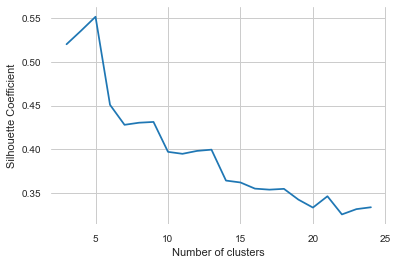

In [47]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [48]:
#For 22 cluster Solution behavior 

from sklearn.cluster import KMeans
km_22=KMeans(n_clusters=22,random_state=123)
km_22.fit(reduced_cr)
km_22.labels_

array([ 7, 16,  1, ..., 20, 18, 20])

In [49]:
pd.Series(km_22.labels_).value_counts()


7     554
20    517
0     437
14    377
1     361
18    328
16    200
4     146
10     93
15     38
5      31
12     29
9      22
11     22
3      13
13     12
6       6
2       5
21      4
17      3
8       2
19      1
dtype: int64

Text(0.5, 0, 'PC_22')

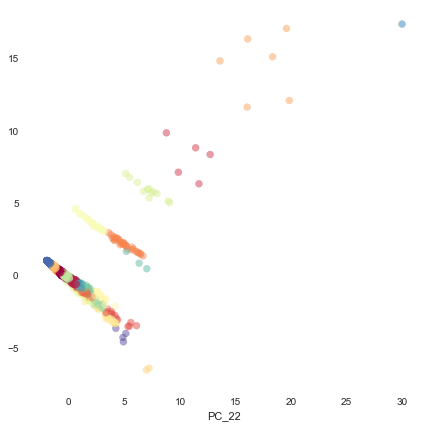

In [50]:
plt.figure(figsize=(7,7))
plt.scatter(reduced_cr[:,0], reduced_cr[:,1], c=km_22.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_22')

In [52]:
cluster_df_22=pd.concat([Medicare_data_group_provider, pd.Series(km_22.labels_, name='Cluster_22')], axis=1)

In [53]:
cluster_df_22

Procedures  Provider State  Region  \
ABBEVILLE GENERAL HOSPITAL             25.0             1.0     1.0   
ABBOTT NORTHWESTERN HOSPITAL          121.0             1.0     1.0   
ABILENE REGIONAL MEDICAL CENTER        71.0             1.0     1.0   
ABINGTON MEMORIAL HOSPITAL            121.0             1.0     1.0   
ACMH HOSPITAL                          54.0             1.0     1.0   
...                                     ...             ...     ...   
3196                                    NaN             NaN     NaN   
3197                                    NaN             NaN     NaN   
3198                                    NaN             NaN     NaN   
3199                                    NaN             NaN     NaN   
3200                                    NaN             NaN     NaN   

                                 Count Of Services     Charges     Payment  \
ABBEVILLE GENERAL HOSPITAL                  1294.0   314058.89   121115.80   
ABBOTT NORTHWESTERN HOSPITAL               20810.0  4495571.85  1065438.89   
ABILENE REGIONAL MEDICAL CENTER             7285.0  3613719.38   516580.33   
ABINGTON MEMORIAL HOSPITAL                 19300.0  6832266.25  1027582.36   
ACMH HOSPITAL                               4151.0   406719.05   199332.50   
...                                            ...         ...         ...   
3196                                           NaN         NaN         NaN   
3197                                           NaN         NaN         NaN   
3198                                           NaN         NaN         NaN   
3199                                           NaN         NaN         NaN   
3200                                           NaN         NaN         NaN   

                                 Cluster_22  
ABBEVILLE GENERAL HOSPITAL              NaN  
ABBOTT NORTHWESTERN HOSPITAL            NaN  
ABILENE REGIONAL MEDICAL CENTER         NaN  
ABINGTON MEMORIAL HOSPITAL              NaN  
ACMH HOSPITAL                           NaN  
...                                     ...  
3196                                    7.0  
3197                                    5.0  
3198                                   20.0  
3199                                   18.0  
3200                                   20.0  

[6402 rows x 7 columns]

In [54]:
#4. Creating the cluster at Region level to identify the region with least similarity
#Based on the cluster analysis follwing 4 Providers stands out as least similar to other providers by K-MEANS Analysis

Medicare_data_group_region.head()


Region  Procedures  Provider State  Provider Name  \
0   AK - Anchorage         100               1              9   
1  AL - Birmingham         127               2             40   
2      AL - Dothan         122               3             10   
3  AL - Huntsville         125               2              8   
4      AL - Mobile         125               2             14   

   Count Of Services      Charges      Payment  
0              31406   9427445.52   3390445.95  
1             166237  68364063.11  14648212.20  
2              43700   9561883.16   2419670.08  
3              71691  11754072.47   3090569.68  
4              70394  16193817.95   4256181.67

In [55]:
#A.Creating data for fitting into cluster analysis
Medicare_data_group_region_num = Medicare_data_group_region.select_dtypes(include =['int64', 'float64']).copy()

In [56]:
col_list_reg = Medicare_data_group_region_num.columns


In [57]:
#B. Standardizing the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Medicare_region_scaled=sc.fit_transform(Medicare_data_group_region_num)

In [59]:
#C.Applying PCA

from sklearn.decomposition import PCA
var_ratio={}
pc = PCA(n_components=4)
Medicare_region_pca=pc.fit(Medicare_region_scaled)
var_ratio[4]=sum(Medicare_region_pca.explained_variance_ratio_)

In [60]:
reduced_cr_1=pc.fit_transform(Medicare_region_scaled)

In [61]:
var_ratio

{4: 0.9665519044327816}

In [62]:
reduced_cr_1.shape

(306, 4)

In [63]:
Medicare_region_scaled.shape

(306, 6)

In [64]:
pd.DataFrame(pc.components_.T, columns=['PC_' + str(i) for i in range(4)], index=col_list_reg)

PC_0      PC_1      PC_2      PC_3
Procedures         0.317197  0.294480 -0.859202 -0.271965
Provider State     0.117119  0.919499  0.334287  0.079286
Provider Name      0.486000  0.004980  0.219587 -0.151846
Count Of Services  0.424189 -0.090060 -0.149066  0.852557
Charges            0.467551 -0.192563  0.227669 -0.410366
Payment            0.500932 -0.150287  0.166591 -0.037931

In [65]:
pd.Series(pc.explained_variance_ratio_,index=['PC_' + str(i) for i in range(4)])

PC_0    0.607834
PC_1    0.170807
PC_2    0.115609
PC_3    0.072302
dtype: float64

In [66]:
#D. Clustering
#Silhouette Coefficient
from sklearn import metrics
# calculate SC for K=3 through K=20
k_range = range(3, 22)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Medicare_region_scaled)
    scores.append(metrics.silhouette_score(Medicare_region_scaled, km.labels_))

In [67]:
scores


[0.31469461595992654,
 0.3872393086154885,
 0.4059540045327712,
 0.4165834248158977,
 0.36023564426745114,
 0.37360785183968076,
 0.3318186020984807,
 0.35922684225522306,
 0.32486144020671803,
 0.30874692258484987,
 0.34302864297751723,
 0.332025356155216,
 0.3506240844656679,
 0.3352489444404559,
 0.3416901475879374,
 0.31077277154499394,
 0.31811207837995975,
 0.3129355237199369,
 0.31127906990287796]

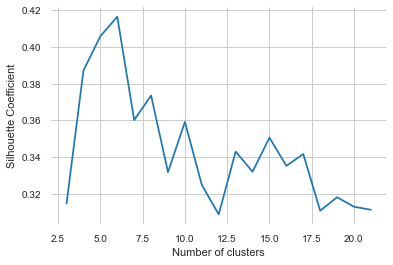

In [68]:

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [69]:

from sklearn.cluster import KMeans

km_20=KMeans(n_clusters=20,random_state=123)
km_20.fit(reduced_cr_1)
km_20.labels_
pd.Series(km_20.labels_).value_counts()

4     63
1     45
2     33
19    29
6     29
0     17
14    16
12    15
15    11
18     9
13     8
3      8
11     6
10     4
16     4
9      4
5      2
8      1
7      1
17     1
dtype: int64

Text(0.5, 0, 'PC_20')

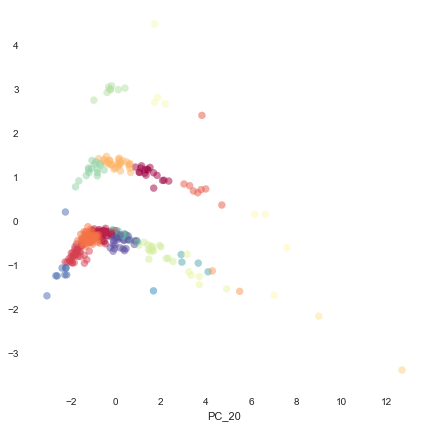

In [70]:

plt.figure(figsize=(7,7))
plt.scatter(reduced_cr_1[:,0], reduced_cr_1[:,1], c=km_20.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_20')

In [72]:
cluster_df_20=pd.concat([Medicare_data_group_region, pd.Series(km_20.labels_, name='Cluster_20')], axis=1)

=========================================================================================================================